In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import regularizers


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [89]:
np.random.seed(42)
tf.random.set_seed(42)

Q1.

In [90]:
# Load your data
df = pd.read_csv(r"diabetesd.csv")

In [91]:
display(df)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [92]:
print(f"Shape: {df.shape}")
display(df.describe())

Shape: (768, 9)


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [93]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [94]:
display(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [95]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [97]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train = X_train_scaled.astype(np.float32)
X_test = X_test_scaled.astype(np.float32)

In [99]:
display(X_train)

array([[0.05882353, 0.6080402 , 0.6393443 , ..., 0.58122206, 0.07884187,
        0.11666667],
       [0.7058824 , 0.44221106, 0.60655737, ..., 0.5260805 , 0.13095768,
        0.45      ],
       [0.05882353, 0.5427136 , 0.4918033 , ..., 0.5290611 , 0.14743875,
        0.05      ],
       ...,
       [0.05882353, 0.4874372 , 0.57377046, ..., 0.5678092 , 0.0596882 ,
        0.15      ],
       [0.5294118 , 0.7839196 , 0.704918  , ..., 0.51117736, 0.4922049 ,
        0.35      ],
       [0.23529412, 0.7236181 , 0.47540984, ..., 0.4396423 , 0.09042316,
        0.26666668]], dtype=float32)

In [100]:
display(X_test)

array([[0.7647059 , 0.52261305, 0.59016395, ..., 0.46497765, 0.16971047,
        0.28333333],
       [0.23529412, 0.6381909 , 0.72131145, ..., 0.51415795, 0.22895323,
        0.11666667],
       [0.11764706, 0.4723618 , 0.6229508 , ..., 0.4709389 , 0.2516704 ,
        0.03333334],
       ...,
       [0.        , 0.53266335, 0.57377046, ..., 0.5871833 , 0.23207127,
        0.01666667],
       [0.29411766, 0.6231156 , 0.60655737, ..., 0.5067064 , 0.06057907,
        0.28333333],
       [0.1764706 , 0.6432161 , 0.59016395, ..., 0.4828614 , 0.20712695,
        0.1       ]], dtype=float32)

In [101]:
print("X_train shape:",X_train.shape,"\nX_test shape:",X_test.shape,"\ny_train shape:",y_train.shape,"\ny_test shape:",y_test.shape)

X_train shape: (576, 8) 
X_test shape: (192, 8) 
y_train shape: (576,) 
y_test shape: (192,)


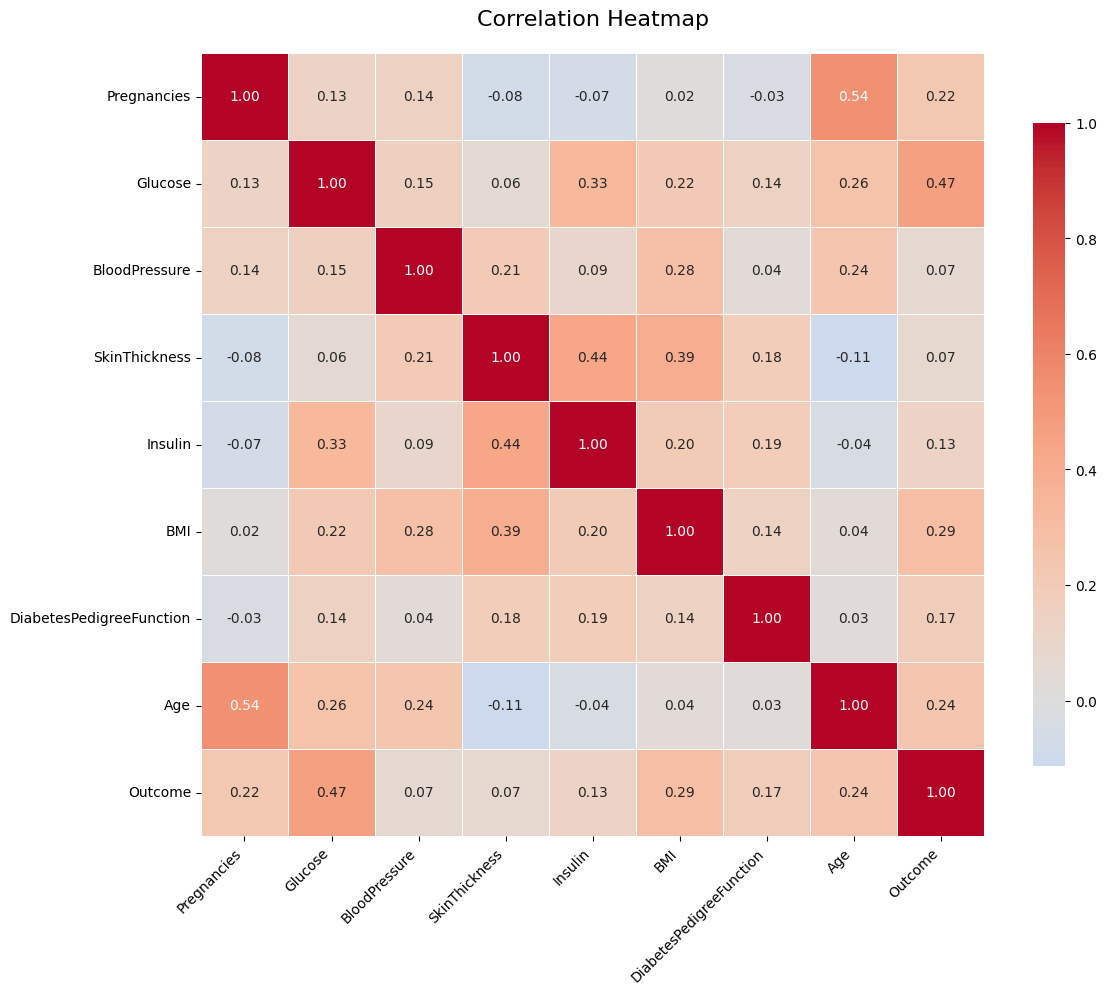

In [102]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q2

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],),activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

display(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

None

In [104]:
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [105]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    verbose=1
)
display(history)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.4935 - loss: 0.6935 - val_accuracy: 0.6810 - val_loss: 0.6723
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6489 - loss: 0.6729 - val_accuracy: 0.6810 - val_loss: 0.6643
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6835 - loss: 0.6680 - val_accuracy: 0.6810 - val_loss: 0.6593
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6435 - loss: 0.6653 - val_accuracy: 0.6897 - val_loss: 0.6557
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6513 - loss: 0.6550 - val_accuracy: 0.6897 - val_loss: 0.6508
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6591 - loss: 0.6526 - val_accuracy: 0.6897 - val_loss: 0.6468
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6738 - loss: 0.6414 - val_accuracy: 0.6897 - val_loss: 0.6421
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6443 - loss: 0.6461 - val_accuracy: 0.6897 - v

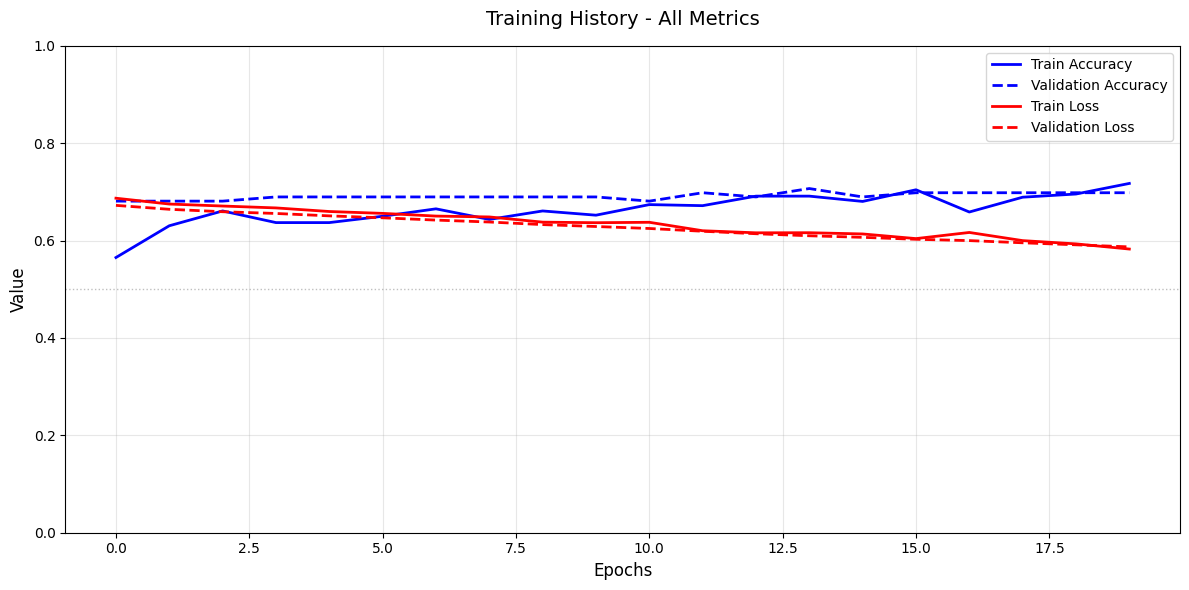

In [106]:
plt.figure(figsize=(12, 6))


plt.plot(history.history['accuracy'], label='Train Accuracy',
         color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',
         color='blue', linestyle='--', linewidth=2)
plt.plot(history.history['loss'], label='Train Loss',
         color='red', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss',
         color='red', linestyle='--', linewidth=2)


plt.title('Training History - All Metrics', fontsize=14, pad=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)


plt.ylim(0, 1)


plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

In [107]:
#Final Test Accuracy
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Final Test Accuracy={test_acc:.3f}")

Final Test Accuracy=0.703


In [ ]:
#Interpretation:
#Training and Validation Accuracies are low, but difference between them is very little.
#As per increasing epochs, accuracy didnt increase.
#Mode couldnt learn much because of simple architecture and less data

Q3

In [108]:
lrs = [ 0.1, 0.01,0.001]
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

LR=0.1: Val Accuracy=0.681
LR=0.01: Val Accuracy=0.819
LR=0.001: Val Accuracy=0.828


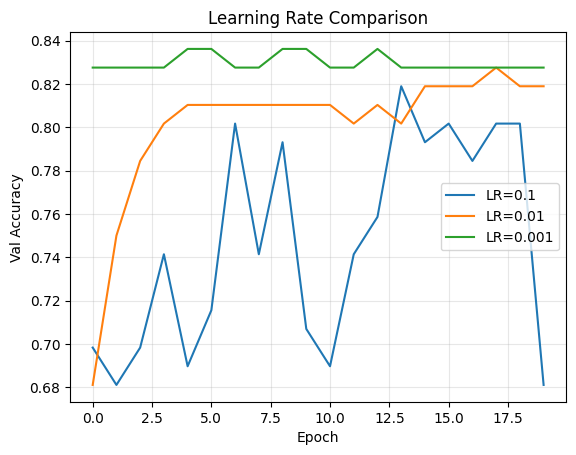

In [109]:
for lr in lrs:
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)


    val_acc = history.history['val_accuracy'][-1]

    print(f"LR={lr}: Val Accuracy={val_acc:.3f}")
    plt.plot(history.history['val_accuracy'], label=f'LR={lr}')

plt.title('Learning Rate Comparison')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [110]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)
display(history)

In [114]:
# Justification for choosing LR= 0.01
# with learning rate 0.001, learning is not stable
#With learning rate 0.1 it overfits to noise
# while with rate = 0.01, it learns successively accross epochs and thus genralizes better

Q4

In [111]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       125
           1       0.63      0.57      0.60        67

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



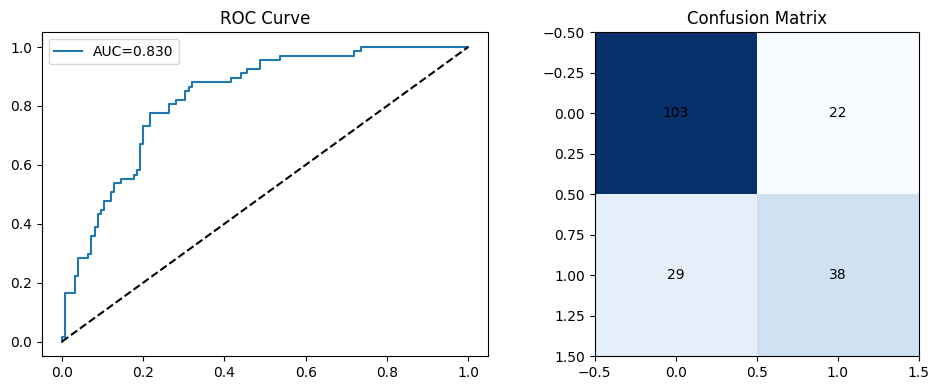

In [112]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC={auc(fpr, tpr):.3f}')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title('ROC Curve')


plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [117]:
#Conclusion:
# Accuracy: 73% - Barely above random guessing (50%)
# Class 0 (Non-diabetic): Decent performance (78% precision, 82% recall)
# Class 1 (Diabetic): Poor performance (63% precision, 57% recall)
#Model couldnt perform well with the given parameters